In [1]:
from src.dataset import FinancialDataset, DataHandler
from src.trainer_new import PortfolioTrainer
from src.markowitz import MaxSharpe
from src.models import NN_Sharpe
import matplotlib.pyplot as plt
import numpy as np
import torch

In [2]:
%load_ext autoreload
%autoreload 2

# Propre

## Extracting Mean and Cov

In [25]:
financial_dataset = FinancialDataset(tickers=["XOM", "TLT"], synthetic=True, n_simul=2000, n_synthetic=700)

[*********************100%***********************]  2 of 2 completed


In [26]:
returns = financial_dataset._raw_data['returns'].values

mean_th = returns.mean(axis=0)
cov_th = np.cov(returns, rowvar=False)

In [27]:
mean_th

array([0.00031588, 0.00016635])

In [28]:
cov_th

array([[ 8.39156682e-05, -5.52689184e-05],
       [-5.52689184e-05,  2.79139769e-04]])

## Test avec 2 actifs et matrice de cov plein de 0

In [29]:
cov_th = np.array([[ 0, 0],
       [0,  0]])

In [30]:
financial_dataset = FinancialDataset(tickers=["XOM", "TLT"], synthetic=True, n_simul=3, n_synthetic=1000, mean=mean_th, cov=cov_th)

[*********************100%***********************]  2 of 2 completed


In [31]:
data_handler = DataHandler(
    dataset=financial_dataset,
    initial_train_years=1,
    retrain_years=1,
    rolling_window=100,
    batch_size=5,
    overlap=False,
    shuffle=True,
    on_synthetic=True
)

trainer = PortfolioTrainer(
    model=NN_Sharpe(input_size=data_handler.n_assets,
                    hidden_size=10,
                    num_layers=3,
                    
                    output_size=data_handler.n_assets,
                    temperature=1),
    
    data_handler=data_handler,
    device='cpu',
    epochs=2,
    lr=0.001,
    weight_decay=0,
    permute_assets=False
)

In [32]:
data_handler.dataset.cov

array([[0, 0],
       [0, 0]])

In [33]:
trainer.train(compute_marko_weights=['sharpe_torch' , 'marko_torch'])

Training period from 101 to 353
Investment period from 353 to 605


100%|██████████| 2/2 [00:00<00:00,  6.63it/s]


-866.2416534423828
torch.Size([756, 100, 2])
756 3 605 353


100%|██████████| 3/3 [00:00<00:00, 5428.35it/s]


Training period from 353 to 605
Investment period from 605 to 857


100%|██████████| 2/2 [00:00<00:00,  6.74it/s]


-1974.7912902832031
torch.Size([756, 100, 2])
756 3 857 605


100%|██████████| 3/3 [00:00<00:00, 4610.81it/s]


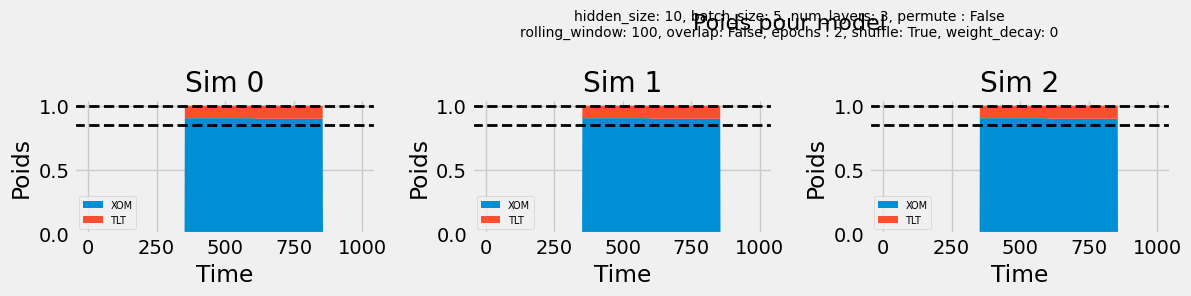

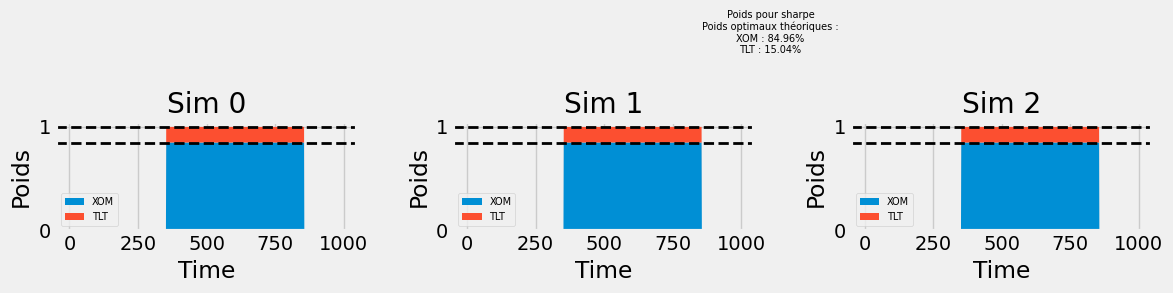

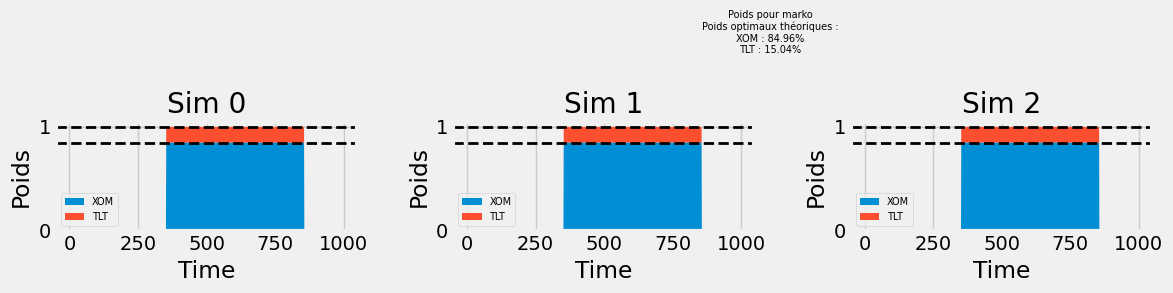

In [34]:
trainer.plot_weights(type_w='model', th_weights='sharpe')
trainer.plot_weights(type_w='sharpe', th_weights='sharpe')
trainer.plot_weights(type_w='marko', th_weights='marko')

## Test avec 3 actifs et matrice de cov 0,0,0

## Extracting Mean and Cov

In [3]:
financial_dataset = FinancialDataset(tickers=["XOM", "TLT", "GLD"], synthetic=True, n_simul=2000, n_synthetic=700)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed


In [4]:
returns = financial_dataset._raw_data['returns'].values

mean_th = returns.mean(axis=0)
cov_th = np.cov(returns, rowvar=False)

In [5]:
mean_th

array([0.00037681, 0.00031588, 0.00016635])

In [6]:
cov_th

array([[ 1.35957835e-04,  1.49688932e-05,  2.02862674e-05],
       [ 1.49688932e-05,  8.39154105e-05, -5.52688282e-05],
       [ 2.02862674e-05, -5.52688282e-05,  2.79139731e-04]])

In [7]:
cov_th = np.array([[ 0,  0,  0],
       [ 0,  0, 0],
       [ 0, 0,  0]])

In [8]:
financial_dataset = FinancialDataset(tickers=["XOM", "TLT", "GLD"], synthetic=True, n_simul=3, n_synthetic=1000, mean=mean_th, cov=cov_th)

[*********************100%***********************]  3 of 3 completed


In [9]:
data_handler = DataHandler(
    dataset=financial_dataset,
    initial_train_years=1,
    retrain_years=1,
    rolling_window=100,
    batch_size=5,
    overlap=False,
    shuffle=True,
    on_synthetic=True
)

trainer = PortfolioTrainer(
    model=NN_Sharpe(input_size=data_handler.n_assets,
                    hidden_size=10,
                    num_layers=3,
                    
                    output_size=data_handler.n_assets,
                    temperature=1),
    
    data_handler=data_handler,
    device='cpu',
    epochs=2,
    lr=0.001,
    weight_decay=0,
    permute_assets=False
)

/usr/local/lib/python3.12/site-packages/src/markowitz.py:98: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4413.)
  risk    = torch.sqrt(weights.T@cov_matrix@weights + 1e-8)


In [10]:
trainer.train(compute_marko_weights=['sharpe_torch' , 'marko_torch'])

Training period from 101 to 353
Investment period from 353 to 605


100%|██████████| 2/2 [00:00<00:00,  5.18it/s]


-649.4696655273438
torch.Size([756, 100, 3])
756 3 605 353


100%|██████████| 3/3 [00:00<00:00, 2341.88it/s]


Training period from 353 to 605
Investment period from 605 to 857


100%|██████████| 2/2 [00:00<00:00,  6.12it/s]


-935.8694305419922
torch.Size([756, 100, 3])
756 3 857 605


100%|██████████| 3/3 [00:00<00:00, 4505.16it/s]


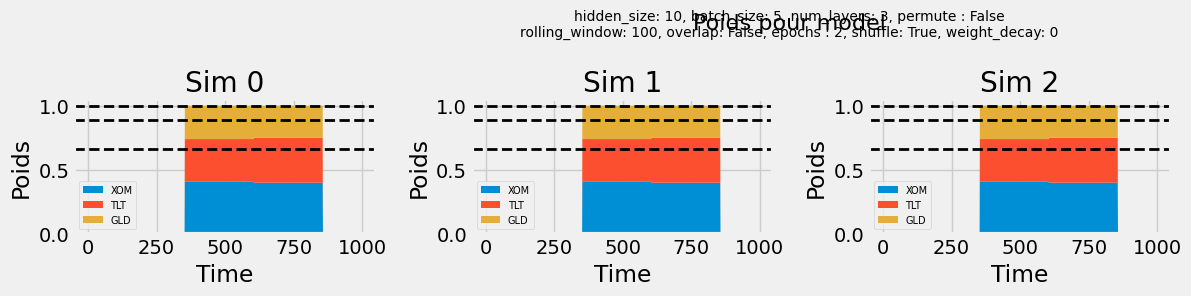

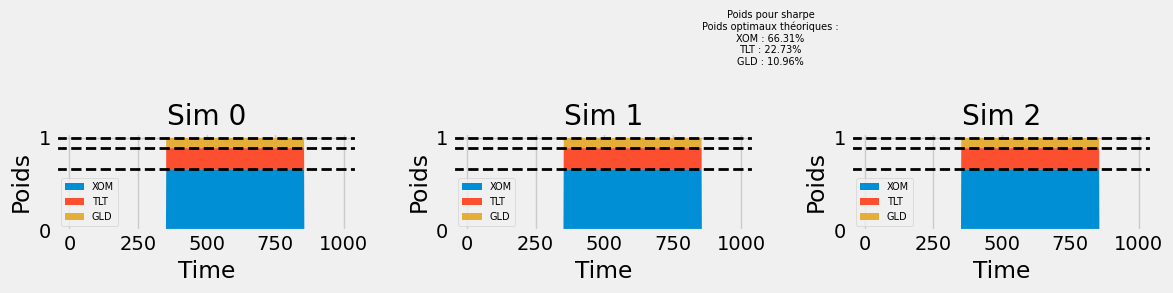

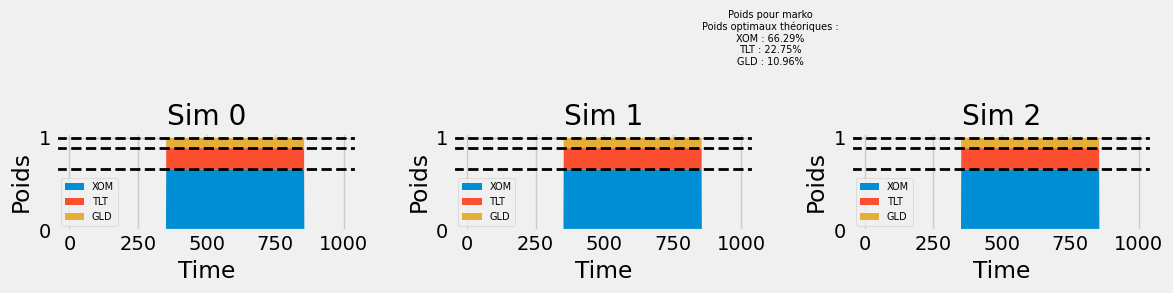

In [11]:
trainer.plot_weights(type_w='model', th_weights='sharpe')
trainer.plot_weights(type_w='sharpe', th_weights='sharpe')
trainer.plot_weights(type_w='marko', th_weights='marko')